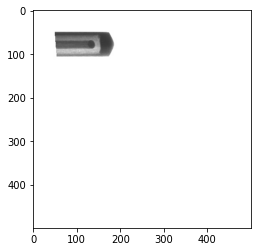

In [514]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


threshold = 20
area = 40
image_path = r'obj 4.jpg'
img = cv2.imread(image_path)
plt.imshow(img)

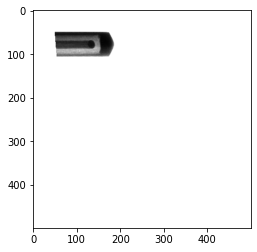

In [515]:
im_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(im_gray, cmap="gray")

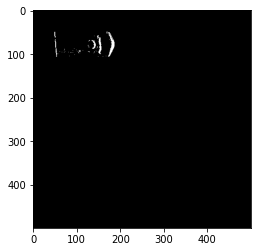

In [516]:
def sobel_edge_detection(image_path, blur_ksize=1, sobel_ksize=1, skipping_threshold=25):
    """
    image_path: link to image
    blur_ksize: kernel size parameter for Gaussian Blurry
    sobel_ksize: size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
    skipping_threshold: ignore weakly edge
    """
    # read image
    img = cv2.imread(image_path)

    # convert BGR to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)

    # sobel algorthm use cv2.CV_64F
    sobelx64f = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobelx64f)
    img_sobelx = np.uint8(abs_sobel64f)

    sobely64f = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobely64f)
    img_sobely = np.uint8(abs_sobel64f)

    # calculate magnitude
    img_sobel = (img_sobelx + img_sobely)/3*2

    # ignore weakly pixel
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

plt.imshow(sobel_edge_detection(image_path, skipping_threshold=threshold), cmap="gray")

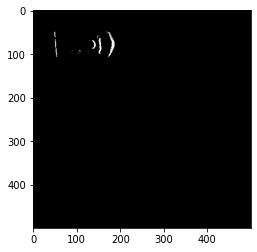

In [517]:
img_sobel = sobel_edge_detection(image_path)
gray_x = img_sobel.astype(np.uint8)
img = cv2.imread(image_path)
mask = np.zeros(img_sobel.shape,np.uint8)
ret, thresh = cv2.threshold(gray_x, 200, 255, 0)
plt.imshow(thresh, cmap="gray")

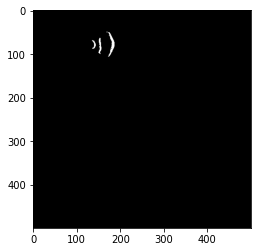

In [518]:
contours, hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if area<cv2.contourArea(cnt) and w < h:
        left = tuple(cnt[cnt[:, :, 0].argmin()][0])
        right = tuple(cnt[cnt[:, :, 0].argmax()][0])
        top = tuple(cnt[cnt[:, :, 1].argmin()][0])
        bottom = tuple(cnt[cnt[:, :, 1].argmax()][0])
        #print(right)
        cv2.drawContours(mask,[cnt],0,255,-1)

plt.imshow(mask, cmap='gray')

In [519]:
for cnt in contours:
    if area < cv2.contourArea(cnt):
        print(cv2.contourArea(cnt))
        left = tuple(cnt[cnt[:, :, 0].argmin()][0])
        right = tuple(cnt[cnt[:, :, 0].argmax()][0])
        top = tuple(cnt[cnt[:, :, 1].argmin()][0])
        bottom = tuple(cnt[cnt[:, :, 1].argmax()][0])

        print(left)
        print(right)
        print(top)
        print(bottom)

51.0
(135, 69)
(143, 82)
(135, 69)
(136, 88)
101.5
(150, 96)
(156, 90)
(152, 64)
(154, 100)
223.5
(168, 50)
(186, 83)
(168, 50)
(172, 106)


In [520]:
right_list_y = []
top_list_x = []
bottom_list_x = []
left_list_y = []

# Additional array support draw function
right_list = []

for cnt in contours:
    if area < cv2.contourArea(cnt):
        left = tuple(cnt[cnt[:, :, 0].argmin()][0])
        right = tuple(cnt[cnt[:, :, 0].argmax()][0])
        top = tuple(cnt[cnt[:, :, 1].argmin()][0])
        bottom = tuple(cnt[cnt[:, :, 1].argmax()][0])


        print(left)
        print(right)
        print(top)
        print(bottom)

        if right[0] - left[0] < 27:
            right_list_y.append(right[0])
            top_list_x.append(top[1])
            bottom_list_x.append(bottom[1])
            left_list_y.append(left[0])
            right_list.append(right)

D = max(bottom_list_x) - min(top_list_x)
B = max(right_list_y) - min(right_list_y)
A = right_list_y[1] - min(right_list_y)
W = B - A

(135, 69)
(143, 82)
(135, 69)
(136, 88)
(150, 96)
(156, 90)
(152, 64)
(154, 100)
(168, 50)
(186, 83)
(168, 50)
(172, 106)


13 43 30 56


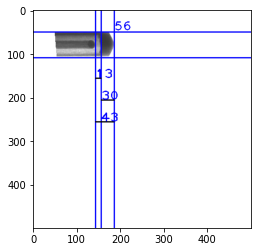

In [521]:
# Remove this in real application
drawn_img = img.copy()
# plt.imshow(drawn_img)
# draw horizontal line
cv2.line(drawn_img, (min(right_list)[0], 0), (min(right_list)[0], img.shape[0]), (0, 0, 255), 2)
cv2.line(drawn_img, (min(right_list)[0] + A, 0), (min(right_list)[0] + A, img.shape[0]), (0, 0, 255),2)
cv2.line(drawn_img, (max(right_list)[0], 0), (max(right_list)[0], img.shape[0]), (0, 0, 255), 2)
# draw vertical line
cv2.line(drawn_img, (0, max(bottom_list_x) + 3), (img.shape[1], max(bottom_list_x) + 3), (0, 0, 255), 2)
cv2.line(drawn_img, (0, min(top_list_x)), (img.shape[1], min(top_list_x)), (0, 0, 255), 2)

# draw the measurement inorder -> D -> B -> W -> A
cv2.putText(drawn_img, str(D), (max(right_list)[0], min(top_list_x) - 3), cv2.FONT_HERSHEY_PLAIN, 2,
            (0, 0, 255), 2)

cv2.line(drawn_img, (min(right_list)[0], max(bottom_list_x) + 150),
        (max(right_list)[0], max(bottom_list_x)  + 150), (0, 0, 0), 2)
cv2.putText(drawn_img, str(B), (min(right_list)[0] + A, max(bottom_list_x) + 150), cv2.FONT_HERSHEY_PLAIN, 2,
            (0, 0, 255), 2)

cv2.line(drawn_img, (min(right_list)[0] + A, max(bottom_list_x) + 100),
        (max(right_list)[0], max(bottom_list_x) + 100), (0, 0, 0), 2)
cv2.putText(drawn_img, str(W), (min(right_list)[0] + A, max(bottom_list_x) + 100), cv2.FONT_HERSHEY_PLAIN, 2,
            (0, 0, 255), 2)

cv2.line(drawn_img, (min(right_list)[0], max(bottom_list_x) + 50),
        (min(right_list)[0] + A, max(bottom_list_x) + 50), (0, 0, 0), 2)
cv2.putText(drawn_img, str(A), (min(right_list)[0], max(bottom_list_x) + 50), cv2.FONT_HERSHEY_PLAIN, 2,
            (0, 0, 255), 2)

plt.imshow(drawn_img)
print(A,B,W,D)

